# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview
mouse_study_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
#How many mice are included in the study?
unique_mice_count = mouse_study_df['Mouse ID'].nunique()
print(unique_mice_count)

249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#duplicate_rows = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'], keep='first')]
#duplicate_rows.head()

# Drop duplicates
cleaned_df = mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
                                
# Display the cleaned DataFrame
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
#cleaned_df = cleaned_df['Mouse ID'].nunique()
#print(cleaned_df)

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mc_df = cleaned_df.describe()
mc_df.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000


In [8]:
#Method for finding the list of drugs included in the study 

#drug_column = cleaned_df['Drug Regimen']
#drug_regimen_list = set(drug_column)
#drug_regimen_list

In [9]:
# Group by 'Drug Regimen' and calculate statistics of 'Tumor Volume (mm3)'
tumor_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', 'sem'])

#rename columns, AI suggested using inplace=True for efficiency.
tumor_df.rename(columns={'mean': 'Mean Tumor Volume',
                   'median': 'Median Tumor Volume',
                   'var': 'Tumor Volume Variance',
                   'std': 'Tumor Volume Std. Dev.',
                   'sem': 'Tumor Volume Std. Err.'
                   }, inplace=True)

# Display the new dataframe
tumor_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Variance,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466


# Bar and Pie Charts

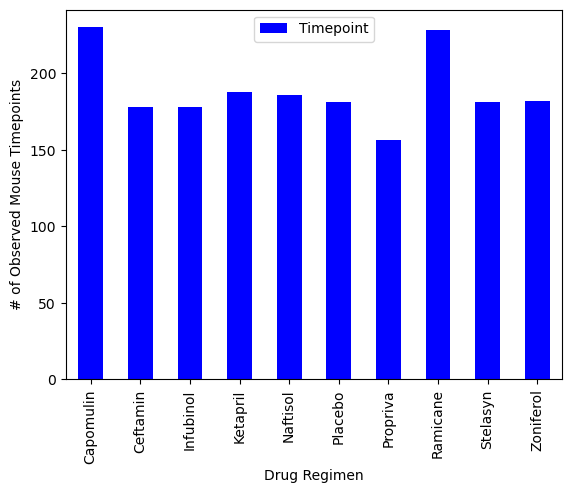

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_df = cleaned_df.groupby('Drug Regimen')['Timepoint'].count().reset_index()

#set the columns
x_column = 'Drug Regimen'
y_column = 'Timepoint'

# Create the bar plot using Pandas
grouped_df.plot(x=x_column, y=y_column, kind='bar', color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

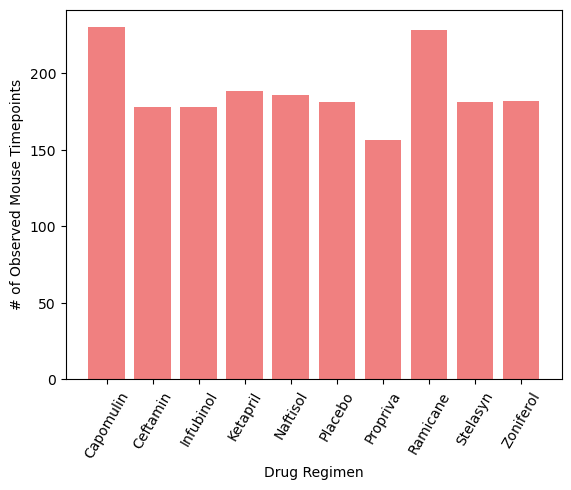

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Matplotlib.
# Set the columns 
x_column = 'Drug Regimen'
y_column = 'Timepoint'

# Create the bar plot using Matplotlib's pyplot
plt.bar(grouped_df[x_column], grouped_df[y_column], color='lightcoral')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=60)
plt.show() 

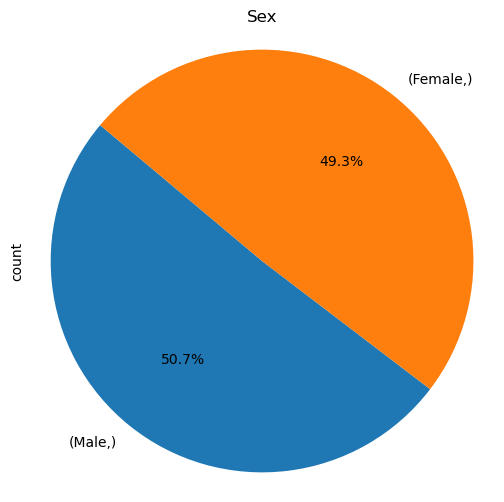

In [12]:
#CHECK FORMATTING BEFORE HANDING IN IF YOU FEEL LIKE IT
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = cleaned_df[['Sex']].value_counts()

# Create a pie chart using Pandas with the selected columns
sex_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6, 6))

# Display the pie chart
plt.title("Sex")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

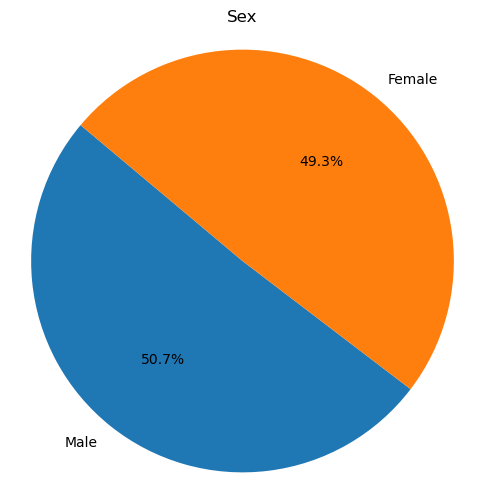

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create a pie chart
# Extract data from the DataFrame column
sexes = cleaned_df['Sex'].value_counts().tolist()  # Assuming 'sizes_column' is the column containing sizes
labels = ['Male', 'Female']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.title("Sex")
plt.pie(sexes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()



## Quartiles, Outliers, and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
long_live_df = cleaned_df.groupby('Mouse ID')['Timepoint'].agg('max')

# Create a new DataFrame with the maximum timepoints
long_live_df = pd.DataFrame(long_live_df)

# Reset the index of the new DataFrame
long_live_df = long_live_df.reset_index()

# Display the new DataFrame
long_live_df.head()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mice_tumor_df = pd.merge(cleaned_df, long_live_df, on=['Mouse ID', 'Timepoint'], how='inner') 
mice_tumor_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [15]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create an empty dictionary to store results for each drug
results = []

# Iterate through each drug name
for drug in drugs:
    # Filter the data based on the current drug name
    filtered_data = mice_tumor_df[mice_tumor_df['Drug Regimen'] == drug]
    
    # Calculate the final tumor volume for each mouse on the filtered data
    final_tumor_volumes = filtered_data['Tumor Volume (mm3)']
    
    results.append(final_tumor_volumes)


    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = final_tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")










# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#iqr_df = mice_tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
#print(iqr_df)
# Calculate Q1 for each drug regimen
#q1 = iqr_df.quantile(0.25)

# Calculate Q3 for each drug regimen
#q3 = iqr_df.quantile(0.75)

# Calculate the IQR for each drug regimen
#iqr = q3 - q1

# Print or store the IQR values for each drug regimen
#print(iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #drugs = []

    # add subset 

    
    # Determine outliers using upper and lower bounds
#upper_bound = q3 - 1.5,(iqr)
#print(upper_bound)

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


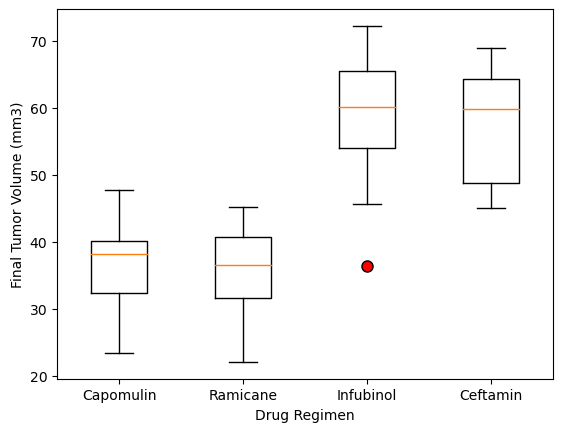

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(results, labels=drugs, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

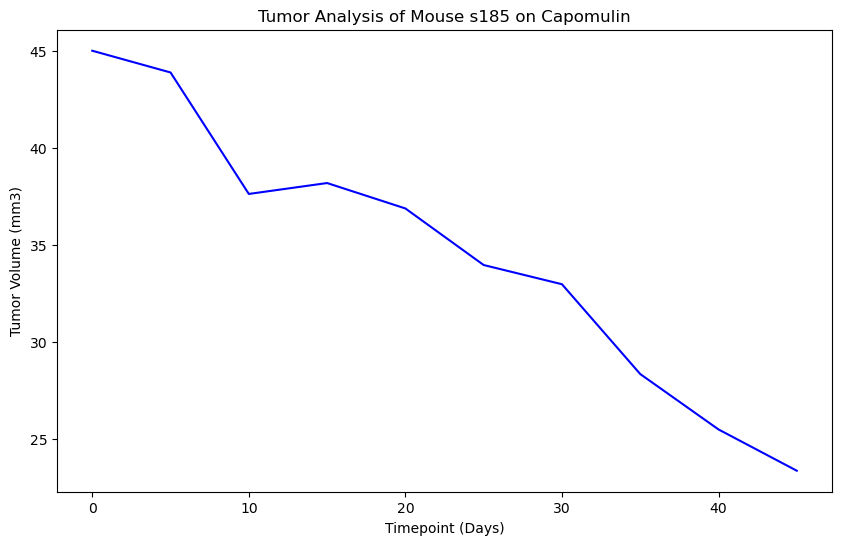

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#choose a mouse ID
#Filter the df by mouse ID
#make the line graph based off tumor volume

# Filtered DataFrame
filtered_df = cleaned_df[cleaned_df['Mouse ID'] == 's185']
#filtered_df.head()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Timepoint'], filtered_df['Tumor Volume (mm3)'], color='b', label='Filtered Data')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Analysis of Mouse s185 on Capomulin')
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen